In [1]:
df=pd.read_excel("E:\HTL Project\Dataset 4.xlsx")
df.head()

<IPython.core.display.Javascript object>

,Moisture,Volatile,Ash,Temp,Time,Pressure,HHV,ERR,Yield%
0,11.8,67.0,8.6,300,30,130,35.2,37.2,36.0
1,3.9,67.4,24.4,350,60,180,37.9,42.7,43.0
2,5.8,67.3,9.5,250,60,100,33.8,33.0,33.0
3,8.5,61.6,18.5,250,30,100,34.8,41.5,24.7
4,4.9,54.4,13.5,375,50,221,36.0,64.8,55.3


In [2]:
df['Moisture']=df['Moisture'].fillna(df['Moisture'].mode()[0])
df['Volatile']=df['Volatile'].fillna(df['Volatile'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])

In [11]:
x=df.drop('HHV',axis=1)
y=df['HHV']
from sklearn.feature_selection import SelectFromModel
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)
print(encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(encoded))
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,encoded)
y_pred =clf.predict(x_test)
y_pred
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
clf1 = tree.DecisionTreeClassifier()
clf1.fit(x_train,encoded)
y_pred1 =clf1.predict(x_train)
y_pred1
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

[11  7 31  9 31 25  2 20  9 19 22 28 31  9  4  8  9  5  2 23 16  9  7  7
 17 36  1 35  9 13 30  3  5 15  5 27 22 34  0  0  9 37  9  5 34 26 10 15
 15  9  5 15 33  5 25 36  7 28 40  9 39 32 32  5  7 24 31 14  9 29  6  2
 29  0 18  9 21 12 38  9]
continuous
multiclass
multiclass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  12.235


<IPython.core.display.Javascript object>

Root mean square error:  146.04722499999997
R2 square:  -0.5574993775258088


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  12.153749999999992


<IPython.core.display.Javascript object>

Root mean square error:  146.01701406249984
R2 square:  -0.3305849648074761


In [12]:
params = {
    'max_depth': [5,10,20,50,100]
}

In [13]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=clf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=4, verbose=2)

In [14]:
rf_grid.fit(x_train,encoded)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [5, 10, 20, 50, 100]}, verbose=2)

In [15]:
rf_grid.best_params_

{'max_depth': 20}

In [16]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
91,36.0,9
64,34.7,34
55,36.4,36
67,10.9,0
3,34.8,28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

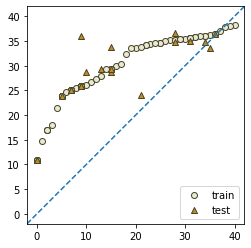

In [17]:
fig, ax = plt.subplots()
ax.scatter(y_pred1,y_train,label='train',color='#e8e7d8',edgecolors='#494623')
ax.scatter(y_pred,y_test,label='test',color='#c3892b',marker ="^",edgecolors='#494623')
#ax.xlabel('Actual Values of HHV',fontsize=14)
#ax.ylabel('Predicted Values of HHV',fontsize=14)
ax.legend()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, '--')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
fig.savefig('/Users/Rishi Chaitanya/Desktop/DT yield 4.png', dpi=300)